In [1]:
#import packages

import pyodbc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#establish connection to SQL Server

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=192.168.10.43;'
                     'Database=VariableData Backup;'
                     'Trusted_connection=yes;')

In [3]:
#store SQL query in stmt object

stmt = '''SELECT 
UserLog_Applications.sName Application,
UserLog_Users.sname UserName,
Stations.sStationID Station,
UserLog_Forms.sName Form,
UserLog_ActionTypes.sName Action,
UserLog_Events.dTime EventDateTime,
nQuarter Quarter,
UserLog_EventPeriods.nYear QuarterYear,
nMonth Month,
UserLog_EventMonths.nYear MonthYear,
sRevenueTypeName RevenueType,
UserLog_Markers.sName MarkerName,
UserLog_Markers.sDescription MarkerDescription

FROM UserLog_Events

LEFT JOIN UserLog_EventPeriods on ULE_ID = ULEP_ULE_IDF
LEFT JOIN UserLog_EventForms on ULE_ID = ULEF_ULE_IDF
LEFT JOIN UserLog_EventMonths on ULE_ID = ULEM_ULE_IDF
LEFT JOIN UserLog_EventRevenueTypes  on ULE_ID = ULER_ULE_IDF
LEFT JOIN UserLog_EventMarkers on   ULE_ID = ULEk_ULE_IDF
LEFT JOIN UserLog_Markers on   ULM_ID = ULEK_ULM_IDF
LEFT JOIN UserLog_ActionTypes on   ULAT_ID = naction
LEFT JOIN UserLog_Forms on   ULF_ID = ULEF_ULF_IDF
INNER JOIN UserLog_Sessions on ULS_ID = FK_ULS_ID 
INNER JOIN UserLog_Users on UserLog_Sessions.gUser = UserLog_Users.guser 
INNER JOIN UserLog_EventStations on UserLog_EventStations.ULES_ULE_IDF = ULE_ID
INNER JOIN Stations on Stations.SN_ID = UserLog_EventStations.ULES_SN_IDF
INNER JOIN UserLog_Applications on UserLog_Forms.ULF_ULA_IDF = UserLog_Applications.ULA_ID'''

In [4]:
#create dataframe using SQL query

df = pd.read_sql(stmt, conn)

In [5]:
df

Application             UserName  Station         Form  \
0      TvRadio_Winform       Jason.Mullenix  WLBT-TV         Main   
1      TvRadio_Winform       Jason.Mullenix  WLBT-TV  Forecasting   
2      TvRadio_Winform       Jason.Mullenix  WLBT-TV  Forecasting   
3      TvRadio_Winform       Jason.Mullenix  WLBT-TV  Forecasting   
4      TvRadio_Winform       Jason.Mullenix  WLBT-TV  Forecasting   
...                ...                  ...      ...          ...   
68718  TvRadio_Winform         Tim.McNamara  WXIA-TV         Main   
68719  TvRadio_Winform  Phillip.Sutterfield  KBEZ-FM  Forecasting   
68720  TvRadio_Winform  Phillip.Sutterfield  KBEZ-FM  Forecasting   
68721  TvRadio_Winform      Charlie.Slaight  WGHP-TV  Forecasting   
68722  TvRadio_Winform      Charlie.Slaight  WGHP-TV  Forecasting   

              Action           EventDateTime  Quarter  QuarterYear  Month  \
0       FormActivate 2021-10-13 14:13:40.550      NaN          NaN    NaN   
1       SubTabChange 2021-10-13 14:14:25.220      3.0       2021.0    NaN   
2       SubTabChange 2021-10-13 14:14:25.220      3.0       2021.0    NaN   
3       ChronoChange 2021-10-13 14:15:23.220      3.0       2020.0    NaN   
4       ChronoChange 2021-10-13 14:15:23.220      3.0       2020.0    NaN   
...              ...                     ...      ...          ...    ...   
68718   FormActivate 2021-10-01 08:58:43.420      NaN          NaN    NaN   
68719  MainTabChange 2021-10-11 14:21:22.810      3.0       2021.0    NaN   
68720  MainTabChange 2021-10-11 14:21:22.810      3.0       2021.0    NaN   
68721   ChronoChange 2021-10-21 14:23:09.370      4.0       2021.0   10.0   
68722   ChronoChange 2021-10-21 14:23:09.370      4.0       2021.0   10.0   

       MonthYear RevenueType  \
0            NaN        None   
1            NaN       Local   
2            NaN       Local   
3            NaN       Local   
4            NaN       Local   
...          ...         ...   
68718        NaN        None   
68719        NaN       Local   
68720        NaN       Local   
68721     2021.0       Local   
68722     2021.0       Local   

                                              MarkerName  \
0                                                   None   
1           TvRadio.WinForms.Forecasting.MainTab.Monthly   
2      TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
3           TvRadio.WinForms.Forecasting.MainTab.Monthly   
4      TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
...                                                  ...   
68718                                               None   
68719       TvRadio.WinForms.Forecasting.MainTab.Monthly   
68720       TvRadio.WinForms.Forecasting.MonthlyTab.Grid   
68721       TvRadio.WinForms.Forecasting.MainTab.Monthly   
68722      TvRadio.WinForms.Forecasting.MonthlyTab.Chart   

                                       MarkerDescription  
0                                                   None  
1      The Monthly tab of the Forecasting form in TvR...  
2      The Pacing Grid tab within Forecasting form's ...  
3      The Monthly tab of the Forecasting form in TvR...  
4      The Pacing Grid tab within Forecasting form's ...  
...                                                  ...  
68718                                               None  
68719  The Monthly tab of the Forecasting form in TvR...  
68720  The Grid tab within Forecasting form's Monthly...  
68721  The Monthly tab of the Forecasting form in TvR...  
68722  The Chart tab within Forecasting form's Monthl...  

[68723 rows x 13 columns]

In [6]:
df_descriptions = df[['Form', 'Action', 'MarkerName', 'MarkerDescription']]

In [7]:
df_descriptions_forecasting = df_descriptions[df_descriptions['Form'] == 'Forecasting']

In [8]:
df_descriptions_forecasting = df_descriptions_forecasting.drop_duplicates()

In [9]:
df_descriptions_forecasting

Form              Action  \
1      Forecasting        SubTabChange   
2      Forecasting        SubTabChange   
3      Forecasting        ChronoChange   
4      Forecasting        ChronoChange   
6      Forecasting        ChronoChange   
8      Forecasting        SubTabChange   
18     Forecasting        ChronoChange   
21     Forecasting        FormActivate   
24     Forecasting  RevenueTypesChange   
25     Forecasting  RevenueTypesChange   
35     Forecasting        SubTabChange   
37     Forecasting            FormOpen   
42     Forecasting  RevenueTypesChange   
57     Forecasting        ChronoChange   
61     Forecasting       MainTabChange   
62     Forecasting       MainTabChange   
131    Forecasting           FormClose   
162    Forecasting       MainTabChange   
301    Forecasting       MainTabChange   
531    Forecasting        ChronoChange   
755    Forecasting        SubTabChange   
1048   Forecasting        ChronoChange   
1059   Forecasting  RevenueTypesChange   
1151   Forecasting        SubTabChange   
1849   Forecasting        ChronoChange   
1937   Forecasting        SubTabChange   
2810   Forecasting       MainTabChange   
5721   Forecasting       MainTabChange   
6495   Forecasting       MainTabChange   
12588  Forecasting       MainTabChange   
18282  Forecasting       MainTabChange   
21141  Forecasting        ChronoChange   
53960  Forecasting       MainTabChange   
55313  Forecasting       MainTabChange   
60495  Forecasting       MainTabChange   

                                              MarkerName  \
1           TvRadio.WinForms.Forecasting.MainTab.Monthly   
2      TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
3           TvRadio.WinForms.Forecasting.MainTab.Monthly   
4      TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
6           TvRadio.WinForms.Forecasting.MonthlyTab.Grid   
8          TvRadio.WinForms.Forecasting.MonthlyTab.Chart   
18         TvRadio.WinForms.Forecasting.MonthlyTab.Chart   
21                                                  None   
24          TvRadio.WinForms.Forecasting.MainTab.Monthly   
25          TvRadio.WinForms.Forecasting.MonthlyTab.Grid   
35          TvRadio.WinForms.Forecasting.MonthlyTab.Grid   
37                                                  None   
42         TvRadio.WinForms.Forecasting.MonthlyTab.Chart   
57           TvRadio.WinForms.Forecasting.MainTab.Weekly   
61          TvRadio.WinForms.Forecasting.MainTab.Monthly   
62          TvRadio.WinForms.Forecasting.MonthlyTab.Grid   
131                                                 None   
162       TvRadio.WinForms.Forecasting.MainTab.Political   
301          TvRadio.WinForms.Forecasting.MainTab.Weekly   
531    TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
755    TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
1048    TvRadio.WinForms.Forecasting.MonthlyTab.YearView   
1059    TvRadio.WinForms.Forecasting.MonthlyTab.YearView   
1151    TvRadio.WinForms.Forecasting.MonthlyTab.YearView   
1849         TvRadio.WinForms.Forecasting.MainTab.Booked   
1937   TvRadio.WinForms.Forecasting.MonthlyTab.Quarte...   
2810         TvRadio.WinForms.Forecasting.MainTab.Booked   
5721       TvRadio.WinForms.Forecasting.MainTab.Economic   
6495         TvRadio.WinForms.Forecasting.MainTab.Market   
12588   TvRadio.WinForms.Forecasting.MonthlyTab.YearView   
18282  TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
21141  TvRadio.WinForms.Forecasting.MonthlyTab.Quarte...   
53960      TvRadio.WinForms.Forecasting.MonthlyTab.Chart   
55313  TvRadio.WinForms.Forecasting.MonthlyTab.Pacing...   
60495  TvRadio.WinForms.Forecasting.MonthlyTab.Quarte...   

                                       MarkerDescription  
1      The Monthly tab of the Forecasting form in TvR...  
2      The Pacing Grid tab within Forecasting form's ...  
3      The Monthly tab of the Forecasting form in TvR...  
4      The Pacing Grid tab within Forecasting form's ...  
6      The Grid tab within Forecasting form's

In [10]:
df_descriptions_main = df_descriptions[df_descriptions['Form'] == 'Main']

In [11]:
df_descriptions_main = df_descriptions_main.drop_duplicates()

In [12]:
df_descriptions_main

Form               Action                      MarkerName  \
0      Main         FormActivate                            None   
12     Main  MainNavigationClick             NavigateTo_Forecast   
67     Main  MainNavigationClick           NavigateTo_SkimWindow   
163    Main  MainNavigationClick       NavigateTo_CustomerCharts   
309    Main             FormOpen                            None   
1224   Main  MainNavigationClick      NavigateTo_HoldingCapacity   
1261   Main  MainNavigationClick      NavigateTo_Station_Chooser   
1594   Main  MainNavigationClick           NavigateTo_FinalRates   
1834   Main  MainNavigationClick        NavigateTo_Matching_Skim   
3571   Main  MainNavigationClick            NavigateTo_PricePlan   
5171   Main  MainNavigationClick              NavigateTo_Options   
5180   Main  MainNavigationClick       NavigateTo_GridCardCreate   
6620   Main  MainNavigationClick             NavigateTo_Dayparts   
9282   Main            FormClose                            None   
10584  Main  MainNavigationClick      NavigateTo_Forecast_Weekly   
10943  Main  MainNavigationClick            NavigateTo_PdfExport   
19830  Main  MainNavigationClick       NavigateTo_MarketModeling   
30077  Main  MainNavigationClick   NavigateTo_ClusterPerformance   
41142  Main  MainNavigationClick           NavigateTo_ShowEditor   
58799  Main  MainNavigationClick  NavigateTo_PlanningRateIndexes   
63373  Main  MainNavigationClick           NavigateTo_ReviewMode   

                                       MarkerDescription  
0                                                   None  
12     The User Performed an action to Navigate to Fo...  
67     The User Performed an action to Navigate to Sk...  
163    The User Performed an action to Navigate to Cu...  
309                                                 None  
1224   The User Performed an action to Navigate to Ho...  
1261   The User Performed an action to Navigate to St...  
1594   The User Performed an action to Navigate to Fi...  
1834   The User Performed an action to Navigate to Sk...  
3571   The User Performed an action to Navigate to Pr...  
5171   The User Performed an action to Navigate to Op...  
5180   The User Performed an action to Navigate to Gr...  
6620   The User Performed an action to Navigate to Da...  
9282                                                None  
10584  The User Performed an action to Navigate to Fo...  
10943  The User Performed an action to Navigate to th...  
19830  The User Performed an action to Navigate to Ma...  
30077  The User Performed an action to Navigate to Cl...  
41142  The User Performed an action to Navigate to Sh...  
58799  The User Performed an action to Navigate to Pl...  
63373  The User Performed an action to Navigate to Re...

In [13]:
df_descriptions_custcharts = df_descriptions[df_descriptions['Form'] == 'Customer Charts']

In [14]:
df_descriptions_custcharts = df_descriptions_custcharts.drop_duplicates()

In [15]:
df_descriptions_custcharts

Form         Action  \
9     Customer Charts      FormClose   
51    Customer Charts   FormActivate   
237   Customer Charts  MainTabChange   
376   Customer Charts       FormOpen   
384   Customer Charts   ChronoChange   
4003  Customer Charts  MainTabChange   

                                            MarkerName  \
9                                                 None   
51                                                None   
237      TvRadio.WinForms.CustomerCharts.MainTab.Skims   
376                                               None   
384      TvRadio.WinForms.CustomerCharts.MainTab.Skims   
4003  TvRadio.WinForms.CustomerCharts.MainTab.Trending   

                                      MarkerDescription  
9                                                  None  
51                                                 None  
237   The Skims tab of the Customer Charts form in T...  
376                                                None  
384   The Skims tab of the Customer Charts form in T...  
4003  The Trending tab of the Customer Charts form i...

In [16]:
df_descriptions_priceplan = df_descriptions[df_descriptions['Form'] == 'Price Plan']

In [17]:
df_descriptions_priceplan = df_descriptions_priceplan.drop_duplicates()

In [18]:
df_descriptions_priceplan

Form        Action MarkerName MarkerDescription
2912  Price Plan  FormActivate       None              None
3572  Price Plan  ChronoChange       None              None
4835  Price Plan      FormOpen       None              None

In [19]:
df_descriptions_finalrates = df_descriptions[df_descriptions['Form'] == 'Final Rates']

In [20]:
df_descriptions_finalrates = df_descriptions_finalrates.drop_duplicates()

In [21]:
df_descriptions_finalrates

Form         Action  \
2341   Final Rates   FormActivate   
2342   Final Rates      FormClose   
2439   Final Rates  MainTabChange   
4584   Final Rates       FormOpen   
6572   Final Rates  MainTabChange   
12583  Final Rates  MainTabChange   
17659  Final Rates  MainTabChange   
17660  Final Rates  MainTabChange   

                                              MarkerName  \
2341                                                None   
2342                                                None   
2439   TvRadio.WinForms.FinalRates.MainTab.InventoryData   
4584                                                None   
6572   TvRadio.WinForms.FinalRates.MainTab.RateCardDe...   
12583  TvRadio.WinForms.FinalRates.MainTab.RateCardGr...   
17659   TvRadio.WinForms.FinalRates.MainTab.ManualExport   
17660  TvRadio.WinForms.FinalRates.MainTab.ExportTemp...   

                                       MarkerDescription  
2341                                                None  
2342                                                None  
2439   The Inventory Data tab of the Final Rates form...  
4584                                                None  
6572   The Rate Card Decisions tab of the Final Rates...  
12583  The Rate Card Grouping tab of the Final Rates ...  
17659  The Manual Export tab of the Final Rates form ...  
17660  The Export Templates tab of the Final Rates fo...

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68723 entries, 0 to 68722
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Application        68723 non-null  object        
 1   UserName           68723 non-null  object        
 2   Station            68723 non-null  object        
 3   Form               68723 non-null  object        
 4   Action             68723 non-null  object        
 5   EventDateTime      68723 non-null  datetime64[ns]
 6   Quarter            48698 non-null  float64       
 7   QuarterYear        48698 non-null  float64       
 8   Month              11136 non-null  float64       
 9   MonthYear          11136 non-null  float64       
 10  RevenueType        47537 non-null  object        
 11  MarkerName         52014 non-null  object        
 12  MarkerDescription  52014 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 6.8

In [23]:
df = df.drop_duplicates()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68679 entries, 0 to 68722
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Application        68679 non-null  object        
 1   UserName           68679 non-null  object        
 2   Station            68679 non-null  object        
 3   Form               68679 non-null  object        
 4   Action             68679 non-null  object        
 5   EventDateTime      68679 non-null  datetime64[ns]
 6   Quarter            48656 non-null  float64       
 7   QuarterYear        48656 non-null  float64       
 8   Month              11136 non-null  float64       
 9   MonthYear          11136 non-null  float64       
 10  RevenueType        47495 non-null  object        
 11  MarkerName         51972 non-null  object        
 12  MarkerDescription  51972 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 7.3

# Initial Exploration

In [25]:
#store number of unique clients in num_of_clients object

num_of_clients = len(df.UserName.unique())

In [26]:
#store earliest date and time in min_date object

min_date = df.EventDateTime.min()

In [27]:
f"The number of unique clients who've logged into ShareBuilders since {min_date}: {num_of_clients} clients"

"The number of unique clients who've logged into ShareBuilders since 2021-09-21 17:42:40.020000: 175 clients"

In [28]:
#store the unique forms that the clients have accessed in forms object

forms = df.Form.unique()

In [29]:
f'Forms that the {num_of_clients} clients have accessed: {forms}'

"Forms that the 175 clients have accessed: ['Main' 'Forecasting' 'Customer Charts' 'Final Rates' 'Price Plan']"

# Simple Actions Per Form Breakdown

In [30]:
#create Form.Action column that stores the merged strings of the Form and Action columns

df['Form.Action'] = df['Form'] + "." + df['Action']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
#list the unique actions within each form

df['Form.Action'].unique()

array(['Main.FormActivate', 'Forecasting.SubTabChange',
       'Forecasting.ChronoChange', 'Customer Charts.FormClose',
       'Main.MainNavigationClick', 'Forecasting.FormActivate',
       'Forecasting.RevenueTypesChange', 'Forecasting.FormOpen',
       'Customer Charts.FormActivate', 'Forecasting.MainTabChange',
       'Forecasting.FormClose', 'Customer Charts.MainTabChange',
       'Main.FormOpen', 'Customer Charts.FormOpen',
       'Customer Charts.ChronoChange', 'Final Rates.FormActivate',
       'Final Rates.FormClose', 'Final Rates.MainTabChange',
       'Price Plan.FormActivate', 'Price Plan.ChronoChange',
       'Final Rates.FormOpen', 'Price Plan.FormOpen', 'Main.FormClose'],
      dtype=object)

In [32]:
#store the counts of each action within each form in a dataframe

form_action_count = pd.DataFrame(df['Form.Action'].value_counts())

In [33]:
#rename column to Count

form_action_count = form_action_count.rename(columns={'Form.Action':'Count'})

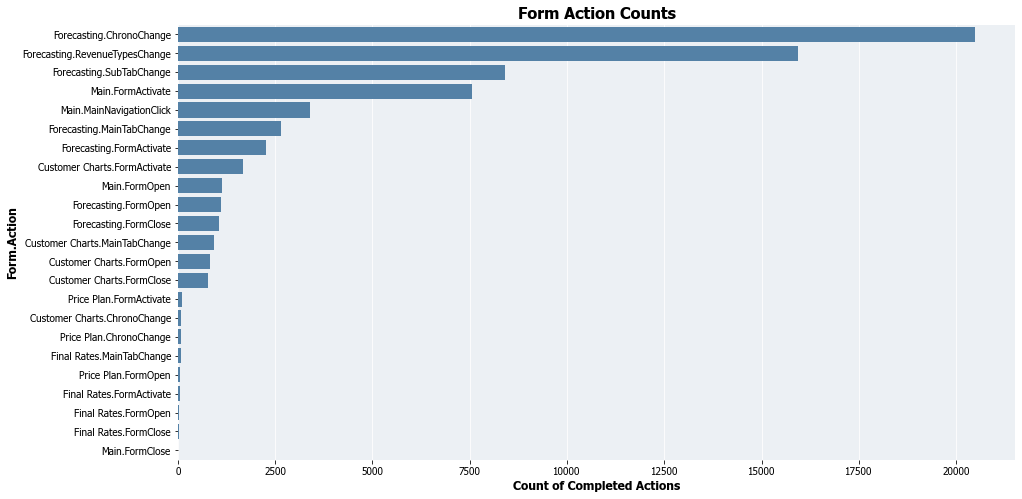

In [34]:
#create horizontal bar plot

plt.style.use('../Kyle Style.mplstyle')
plt.figure(figsize = (15,8))
sns.barplot(x='Count', y=form_action_count.index, data=form_action_count, color='steelblue')
plt.title('Form Action Counts')
plt.ylabel('Form.Action')
plt.xlabel('Count of Completed Actions')
plt.show()

In [35]:
form_action_count

Count
Forecasting.ChronoChange        20489
Forecasting.RevenueTypesChange  15944
Forecasting.SubTabChange         8416
Main.FormActivate                7557
Main.MainNavigationClick         3394
Forecasting.MainTabChange        2650
Forecasting.FormActivate         2267
Customer Charts.FormActivate     1664
Main.FormOpen                    1129
Forecasting.FormOpen             1105
Forecasting.FormClose            1052
Customer Charts.MainTabChange     931
Customer Charts.FormOpen          829
Customer Charts.FormClose         781
Price Plan.FormActivate            98
Customer Charts.ChronoChange       79
Price Plan.ChronoChange            78
Final Rates.MainTabChange          69
Price Plan.FormOpen                41
Final Rates.FormActivate           41
Final Rates.FormOpen               30
Final Rates.FormClose              30
Main.FormClose                      5

# Simple Action Description Breakdown

In [36]:
#unique actions

df.MarkerDescription.unique()

array([None, 'The Monthly tab of the Forecasting form in TvRadio.Client',
       "The Pacing Grid tab within Forecasting form's Monthly tab in TvRadio.Client",
       "The Grid tab within Forecasting form's Monthly tab in TvRadio.Client",
       "The Chart tab within Forecasting form's Monthly tab in TvRadio.Client",
       'The User Performed an action to Navigate to Forecasting in TvRadio.Client',
       'The Weekly tab of the Forecasting form in TvRadio.Client',
       'The User Performed an action to Navigate to Skim Window in TvRadio.Client',
       'The Political tab of the Forecasting form in TvRadio.Client',
       'The User Performed an action to Navigate to Customer Charts in TvRadio.Client',
       'The Skims tab of the Customer Charts form in TvRadio.Client',
       "The Pacing Chart tab within Forecasting form's Monthly tab in TvRadio.Client",
       "The Yearly Grid tab within Forecasting form's Monthly tab in TvRadio.Client",
       'The User Performed an action to Navig

In [37]:
#store the counts of each action within each form in a dataframe

action_description = pd.DataFrame(df['MarkerDescription'].value_counts())

In [38]:
#rename column to Count

action_description = action_description.rename(columns={'MarkerDescription':'Count'})

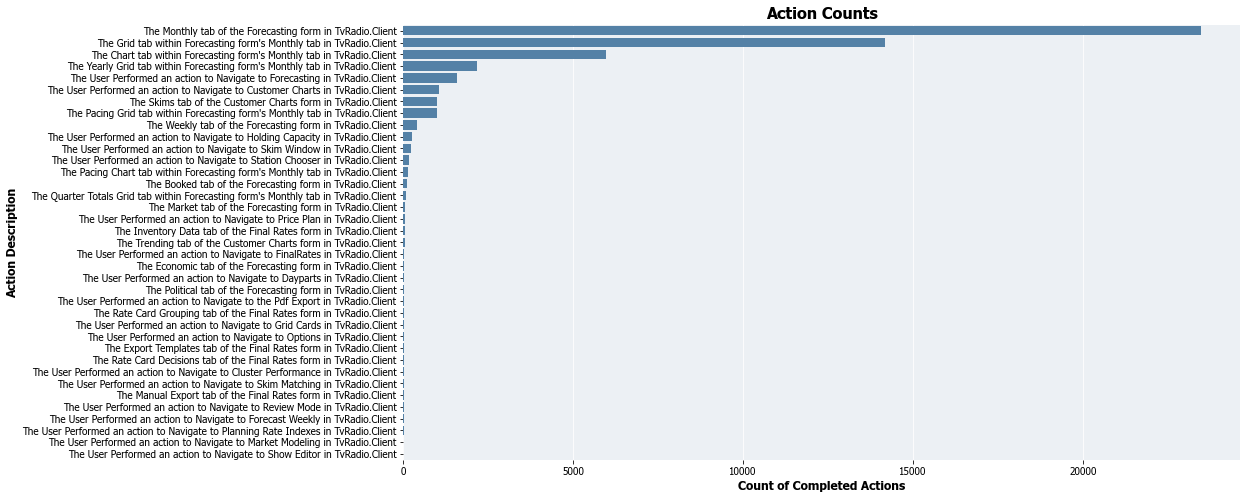

In [39]:
#create horizontal bar plot

plt.style.use('../Kyle Style.mplstyle')
plt.figure(figsize = (15,8))
sns.barplot(x='Count', y=action_description.index, data=action_description, color='steelblue')
plt.title('Action Counts')
plt.ylabel('Action Description')
plt.xlabel('Count of Completed Actions')
plt.show()

In [40]:
action_description

Count
The Monthly tab of the Forecasting form in TvRa...  23464
The Grid tab within Forecasting form's Monthly ...  14179
The Chart tab within Forecasting form's Monthly...   5959
The Yearly Grid tab within Forecasting form's M...   2158
The User Performed an action to Navigate to For...   1571
The User Performed an action to Navigate to Cus...   1036
The Skims tab of the Customer Charts form in Tv...    975
The Pacing Grid tab within Forecasting form's M...    974
The Weekly tab of the Forecasting form in TvRad...    386
The User Performed an action to Navigate to Hol...    263
The User Performed an action to Navigate to Ski...    214
The User Performed an action to Navigate to Sta...    169
The Pacing Chart tab within Forecasting form's ...    125
The Booked tab of the Forecasting form in TvRad...     98
The Quarter Totals Grid tab within Forecasting ...     69
The Market tab of the Forecasting form in TvRad...     52
The User Performed an action to Navigate to Pri...     49
The Inventory Data tab of the Final Rates form ...     39
The Trending tab of the Customer Charts form in...     35
The User Performed an action to Navigate to Fin...     30
The Economic tab of the Forecasting form in TvR...     19
The User Performed an action to Navigate to Day...     16
The Political tab of the Forecasting form in Tv...     16
The User Performed an action to Navigate to the...     12
The Rate Card Grouping tab of the Final Rates f...     11
The User Performed an action to Navigate to Gri...     10
The User Performed an action to Navigate to Opt...      9
The Export Templates tab of the Final Rates for...      9
The Rate Card Decisions tab of the Final Rates ...      7
The User Performed an action to Navigate to Clu...      4
The User Performed an action to Navigate to Ski...      3
The Manual Export tab of the Final Rates form i...      3
The User Performed an action to Navigate to Rev...      2
The User Performed an action to Navigate to For...      2
The User Performed an action to Navigate to Pla...      2
The User Performed an action to Navigate to Mar...      1
The User Performed an action to Navigate to Sho...      1

In [41]:
#get top 10 actions by count

actions_top10 = action_description.nlargest(10, 'Count')

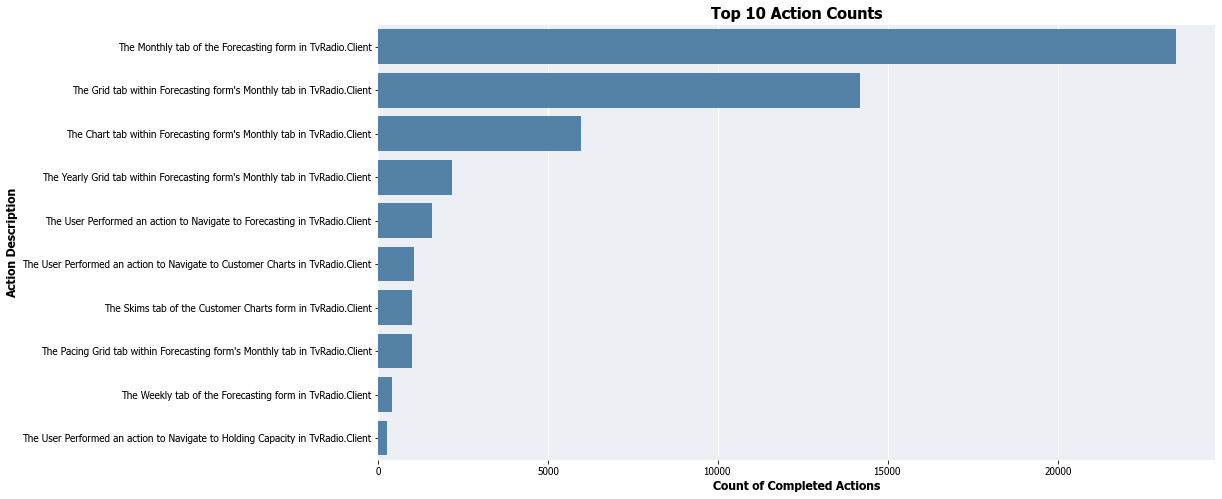

In [42]:
#create horizontal bar plot

plt.style.use('../Kyle Style.mplstyle')
plt.figure(figsize = (15,8))
sns.barplot(x='Count', y=actions_top10.index, data=actions_top10, color='steelblue')
plt.title('Top 10 Action Counts')
plt.ylabel('Action Description')
plt.xlabel('Count of Completed Actions')
plt.show()

In [43]:
actions_top10

Count
The Monthly tab of the Forecasting form in TvRa...  23464
The Grid tab within Forecasting form's Monthly ...  14179
The Chart tab within Forecasting form's Monthly...   5959
The Yearly Grid tab within Forecasting form's M...   2158
The User Performed an action to Navigate to For...   1571
The User Performed an action to Navigate to Cus...   1036
The Skims tab of the Customer Charts form in Tv...    975
The Pacing Grid tab within Forecasting form's M...    974
The Weekly tab of the Forecasting form in TvRad...    386
The User Performed an action to Navigate to Hol...    263

# Client Usage

In [44]:
df.UserName.unique()

array(['Jason.Mullenix', 'Derek.Criss', 'Rick.Burrice', 'Lisa.Nelson',
       'Michael.Korr', 'Tom.Baker', 'Wade.Deaver', 'George.Sirven',
       'Todd.Bernstein', 'Bill.Whittle', 'Stephanie.Burpo',
       'Jeff.Whitson', 'Marcus.Wilkerson', 'Morgan.Cockrell',
       'Paul.Neace', 'Roger.Szuchan', 'Travis.Cundy', 'Miles.Cathey',
       'Brent.McClure', 'Mike.OBrien', 'Joe.Borgwardt',
       'Phillip.Sutterfield', 'Charley.Ferro', 'Kyle.Awerkamp',
       'Kevin.Twohill', 'Shawn.Jordan', 'Charles.Grisham', 'Chris.Coffee',
       'Dan.Scutari', 'Kevin.Jones', 'Stephanie.Clark', 'Alison.Davis',
       'Micah.Malloy', 'Chris.Legg', 'Chris.Murphy', 'JanEl.Daul',
       'Frank.Shurling', 'Ellen.Zetzmann', 'Chad.Woolbright',
       'Michele.Bailey', 'Christopher.Cerha', 'Chad.Kelley', 'Sam.Foley',
       'David.Crouch', 'Sean.Walleck', 'Mark.Manders', 'Lourdes.Keiffer',
       'Angela.Emory', 'Tiffany.Bellingrath', 'Chris.Wilbur',
       'Scott.Dillon', 'Janet.Connella', 'Teresa.Morgan', 'Ashl

In [45]:
#store the counts of each user action in a dataframe

user_actions = pd.DataFrame(df['UserName'].value_counts())

In [46]:
#rename column to Count

user_actions = user_actions.rename(columns={'UserName':'Count'})

In [47]:
#get top 25 users by count of actions

user_actions_top25 = user_actions.nlargest(25, 'Count')

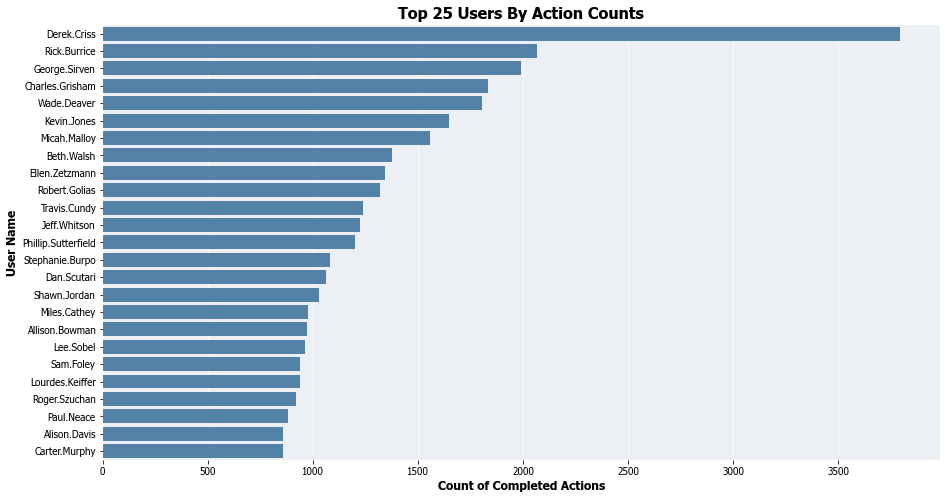

In [48]:
#create horizontal bar plot

plt.style.use('../Kyle Style.mplstyle')
plt.figure(figsize = (15,8))
sns.barplot(x='Count', y=user_actions_top25.index, data=user_actions_top25, color='steelblue')
plt.title("Top 25 Users By Action Counts")
plt.ylabel('User Name')
plt.xlabel('Count of Completed Actions')
plt.show()

In [49]:
user_actions_top25

Count
Derek.Criss           3793
Rick.Burrice          2068
George.Sirven         1991
Charles.Grisham       1834
Wade.Deaver           1806
Kevin.Jones           1648
Micah.Malloy          1555
Beth.Walsh            1377
Ellen.Zetzmann        1342
Robert.Golias         1318
Travis.Cundy          1239
Jeff.Whitson          1223
Phillip.Sutterfield   1201
Stephanie.Burpo       1080
Dan.Scutari           1063
Shawn.Jordan          1029
Miles.Cathey           977
Allison.Bowman         971
Lee.Sobel              962
Sam.Foley              940
Lourdes.Keiffer        939
Roger.Szuchan          919
Paul.Neace             882
Alison.Davis           857
Carter.Murphy          855